# Домашняя работа № 2
1. Провести разведочный анализ данных (EDA)
2. Выполните предобработку данных (preprocessing):
	1. Анализ и восстановление пропусков
	2. Стандартизация или нормализация данных  
3. Выполнить обучение модели решающего дерева для востановления регрессии.
4. Оценить качество пресдказания обученной моделипо известным вам мерикам качества.
5. Исследовать влияние колличества элементов в листе на на кечество предсказания.
6. Исследовать влияние глубины дерева на кечество предсказания.
7. Исследовать влияние размера выборки на качество приесдказания. 
8. Сранить качество предсказания модели решающего дерева с модельб линейной регрессии для выборок размером менее 100	


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

from sklearn import preprocessing 
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

    Unnamed: 0   feature_1    feature_2   feature_3   feature_4   feature_5  \
0         1554  305.231798   826.371568  271.161640  575.837967   74.382642   
1         3177  307.967535   745.993392  275.135967  495.483320   85.391943   
2         7693  303.785315   803.017984         NaN  636.366328   72.929834   
3         1256  304.230460   854.367309  297.576377  616.907242  112.593349   
4         2355  302.504689   860.799562  259.650802  646.634630  117.838917   
5         7995  303.242139   918.790068  277.941924  627.864409  107.477020   
6         6374  307.209067   848.625449  283.655814  588.314797   80.569489   
7          649  305.543349   749.109321  277.973885  571.229211   83.912601   
8         3849  308.104450          NaN  269.019479  681.710937   88.495023   
9         1755         NaN   944.276386  287.729810  644.115629   88.326504   
10        7625  308.235817   772.797560  289.273349  688.087815   82.980129   
11        4579  308.111574   702.217585  270.445285 

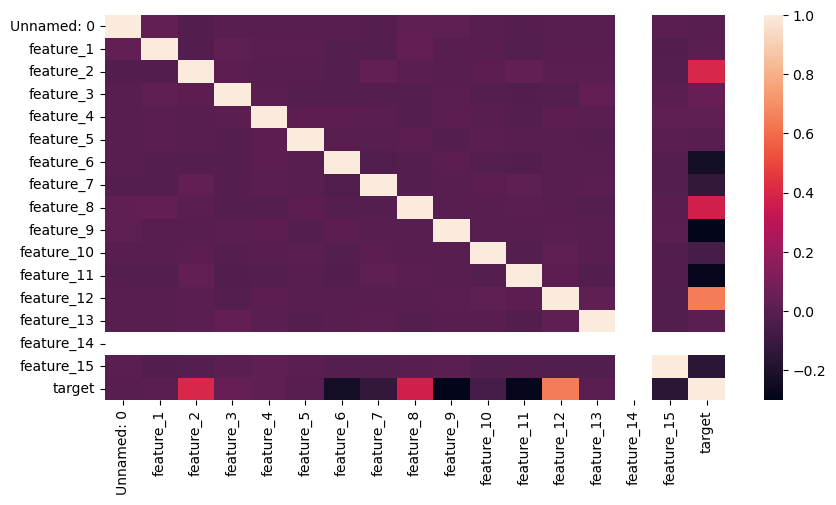

In [2]:
data = pd.read_csv('train-HW_1-sid_13.csv')
dataP = pd.read_csv('test-HW_1-sid_13.csv')
print(data.head(20))
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c)
print(data['feature_14'].unique()) #"feature_14" and "Unnamed: 0" could be deleted
print(data.describe())

In [3]:
coloumns = list(data.columns)
print(coloumns)
coloumns.remove('feature_14')
coloumns.remove('Unnamed: 0')
print(coloumns)
data = data[coloumns]

coloumns2 = list(dataP.columns)
print(coloumns2)
coloumns2.remove('feature_14')
coloumns2.remove('Unnamed: 0')
print(coloumns2)
dataP = dataP[coloumns2]

['Unnamed: 0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'target']
['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_15', 'target']
['Unnamed: 0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15']
['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_15']


In [4]:
print(data.head(20))
print(dataP.head(20))

     feature_1    feature_2   feature_3   feature_4   feature_5    feature_6  \
0   305.231798   826.371568  271.161640  575.837967   74.382642   828.804124   
1   307.967535   745.993392  275.135967  495.483320   85.391943   812.096060   
2   303.785315   803.017984         NaN  636.366328   72.929834   789.869439   
3   304.230460   854.367309  297.576377  616.907242  112.593349   816.439543   
4   302.504689   860.799562  259.650802  646.634630  117.838917   831.076670   
5   303.242139   918.790068  277.941924  627.864409  107.477020   853.603728   
6   307.209067   848.625449  283.655814  588.314797   80.569489   875.749495   
7   305.543349   749.109321  277.973885  571.229211   83.912601   759.464134   
8   308.104450          NaN  269.019479  681.710937   88.495023   669.554710   
9          NaN   944.276386  287.729810  644.115629   88.326504   994.347076   
10  308.235817   772.797560  289.273349  688.087815   82.980129  1086.746265   
11  308.111574   702.217585  270.445285 

In [5]:
columns = list(data.columns)
print(columns)
for column in columns:
    value = data[column].mean()
    data[column].fillna(value,inplace=True)

print(data.info())
print(data.head())
print('-----------------------------')

columns2 = list(dataP.columns)
print(columns2)
for column in columns2:
    value = dataP[column].mean()
    dataP[column].fillna(value,inplace=True)

print(dataP.info())
print(dataP.head())

['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_15', 'target']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   8000 non-null   float64
 1   feature_2   8000 non-null   float64
 2   feature_3   8000 non-null   float64
 3   feature_4   8000 non-null   float64
 4   feature_5   8000 non-null   float64
 5   feature_6   8000 non-null   float64
 6   feature_7   8000 non-null   float64
 7   feature_8   8000 non-null   float64
 8   feature_9   8000 non-null   float64
 9   feature_10  8000 non-null   float64
 10  feature_11  8000 non-null   float64
 11  feature_12  8000 non-null   float64
 12  feature_13  8000 non-null   float64
 13  feature_15  8000 non-null   float64
 14  target      8000 non-null   float6

In [6]:
norm_scel=preprocessing.MinMaxScaler()
std_scel=preprocessing.StandardScaler()

df_norm = pd.DataFrame(norm_scel.fit_transform(data))
print(df_norm.head(20))
dfP_norm = pd.DataFrame(norm_scel.fit_transform(dataP))
print(dfP_norm.head(20))

df_std = pd.DataFrame(std_scel.fit_transform(data))
print(df_std.head(20))
dfP_std = pd.DataFrame(std_scel.fit_transform(dataP))
print(dfP_std.head(20))


spisok = list(df_norm.columns)
print(spisok)

          0         1         2         3         4         5         6   \
0   0.494979  0.521406  0.396122  0.454067  0.266771  0.560457  0.262068   
1   0.615328  0.446782  0.457158  0.251977  0.392646  0.546343  0.457070   
2   0.431347  0.499724  0.502212  0.606295  0.250161  0.527569  0.639245   
3   0.450929  0.547398  0.801788  0.557356  0.703652  0.550012  0.487607   
4   0.375010  0.553370  0.219343  0.632120  0.763628  0.562376  0.268443   
5   0.407452  0.607209  0.500250  0.584913  0.645155  0.581404  0.277215   
6   0.581962  0.542067  0.588002  0.485446  0.337508  0.600111  0.165773   
7   0.508685  0.449674  0.500741  0.442476  0.375732  0.501886  0.671297   
8   0.621351  0.517309  0.363223  0.720336  0.428125  0.425941  0.646517   
9   0.484496  0.630871  0.650569  0.625785  0.426198  0.700288  0.544557   
10  0.627130  0.471667  0.674274  0.736374  0.365070  0.778336  0.585475   
11  0.621664  0.406139  0.385120  0.594808  0.609238  0.521636  0.232300   
12  0.658420

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_std[spisok[:-1]], data['target'], test_size=0.2)

reg = tree.DecisionTreeRegressor(max_depth=20,min_samples_leaf=15)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)

print('MSE = ',MSE)
print('R_2 = ',r2)
print('MAPE = ',MAPE)

#гиперпараметры подобраны на основе исследований ниже ↓


MSE =  8323.125425282718
R_2 =  0.7064433971623016
MAPE =  1.8358313515001692


In [33]:
#влияние числа элементов в листе

MSEar=[]
R_2ar=[]
MAPEar=[]

for i in range (1,100):
    X_train, X_test, y_train, y_test = train_test_split(df_std[spisok[:-1]], data['target'], test_size=0.2)

    reg1 = tree.DecisionTreeRegressor(max_depth=15, min_samples_leaf=i)
    reg1 = reg1.fit(X_train, y_train)
    y_pred = reg1.predict(X_test)
    MSEar.append(mean_squared_error(y_test, y_pred))
    R_2ar.append(r2_score(y_test, y_pred))
    MAPEar.append(mean_absolute_percentage_error(y_test, y_pred))
    
print(statistics.mean(MSEar))
print(statistics.mean(R_2ar))
print(statistics.mean(MAPEar))


9519.185047362544
0.6607003076112085
1.8908322183169675


{'whiskers': [<matplotlib.lines.Line2D at 0x2545c922850>,
 'caps': [<matplotlib.lines.Line2D at 0x2545cb09d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2545cb08090>],
 'medians': [<matplotlib.lines.Line2D at 0x2545cb0add0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2545cb03790>],
 'means': []}

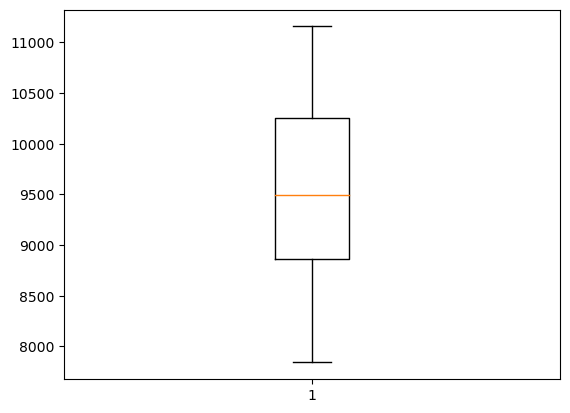

In [8]:
plt.boxplot(MSEar)

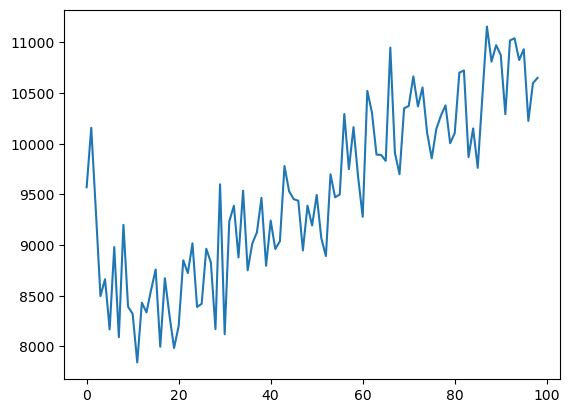

In [9]:
plt.plot(range(len(MSEar)),MSEar)

{'whiskers': [<matplotlib.lines.Line2D at 0x2545cbe9110>,
 'caps': [<matplotlib.lines.Line2D at 0x2545cbea390>,
 'boxes': [<matplotlib.lines.Line2D at 0x2545cbe8890>],
 'medians': [<matplotlib.lines.Line2D at 0x2545cbeb3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2545cbebb10>],
 'means': []}

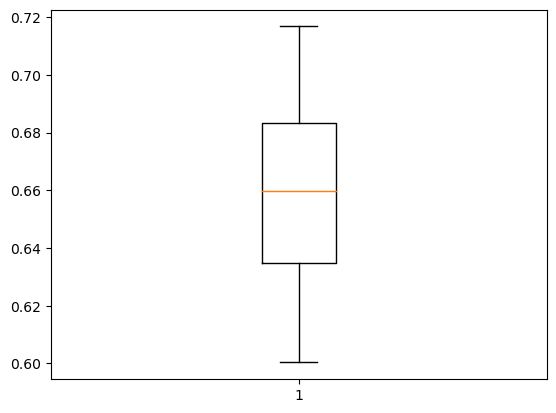

In [10]:
plt.boxplot(R_2ar)

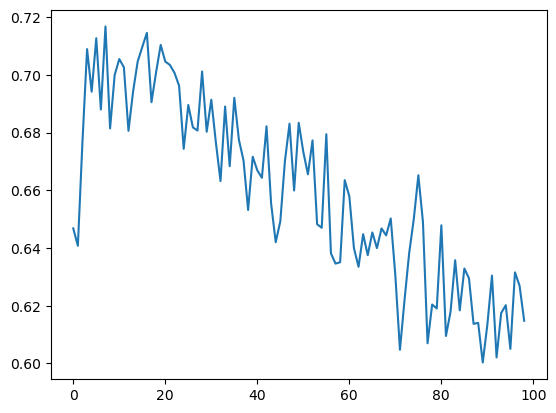

In [11]:
plt.plot(range(len(R_2ar)),R_2ar)

{'whiskers': [<matplotlib.lines.Line2D at 0x2545ccc15d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2545ccc2f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2545ccc0a50>],
 'medians': [<matplotlib.lines.Line2D at 0x2545cccc5d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2545cc25010>],
 'means': []}

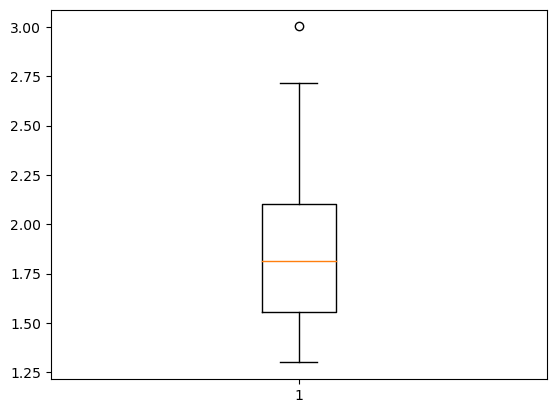

In [12]:
plt.boxplot(MAPEar)

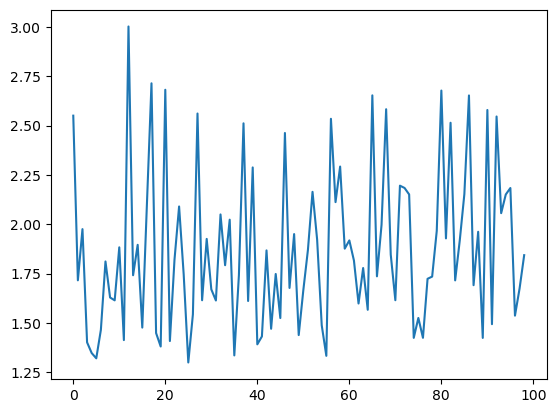

In [13]:
plt.plot(range(len(MAPEar)),MAPEar)

In [14]:
#влияние глубины

MSEar=[]
R_2ar=[]
MAPEar=[]

for i in range (1,100):
    X_train, X_test, y_train, y_test = train_test_split(df_std[spisok[:-1]], data['target'], test_size=0.2)

    reg2 = tree.DecisionTreeRegressor(max_depth=i)
    reg2 = reg2.fit(X_train, y_train)
    y_pred = reg2.predict(X_test)
    MSEar.append(mean_squared_error(y_test, y_pred))
    R_2ar.append(r2_score(y_test, y_pred))
    MAPEar.append(mean_absolute_percentage_error(y_test, y_pred))
    
print(statistics.mean(MSEar))
print(statistics.mean(R_2ar))
print(statistics.mean(MAPEar))


10174.981332184409
0.6363303228716415
1.9160067606104312


{'whiskers': [<matplotlib.lines.Line2D at 0x2545e5d4b10>,
 'caps': [<matplotlib.lines.Line2D at 0x2545e5d5510>,
 'boxes': [<matplotlib.lines.Line2D at 0x2545e5d4210>],
 'medians': [<matplotlib.lines.Line2D at 0x2545e5d6610>],
 'fliers': [<matplotlib.lines.Line2D at 0x2545e5d6ed0>],
 'means': []}

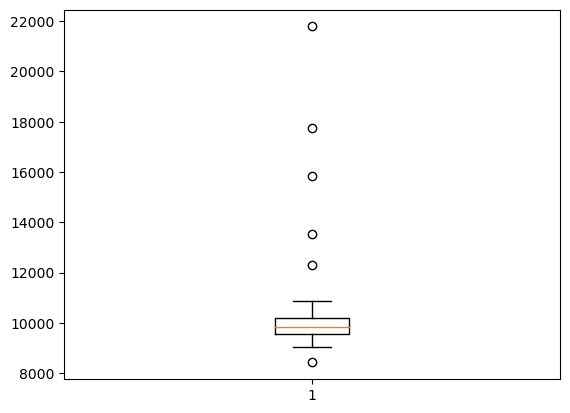

In [15]:
plt.boxplot(MSEar)

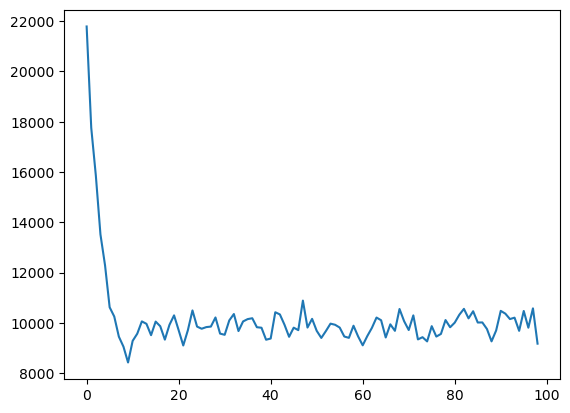

In [16]:
plt.plot(range(len(MSEar)),MSEar)

{'whiskers': [<matplotlib.lines.Line2D at 0x2545e7ce690>,
 'caps': [<matplotlib.lines.Line2D at 0x2545e7cf950>,
 'boxes': [<matplotlib.lines.Line2D at 0x2545e7cded0>],
 'medians': [<matplotlib.lines.Line2D at 0x2545e7d8c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2545e7d9350>],
 'means': []}

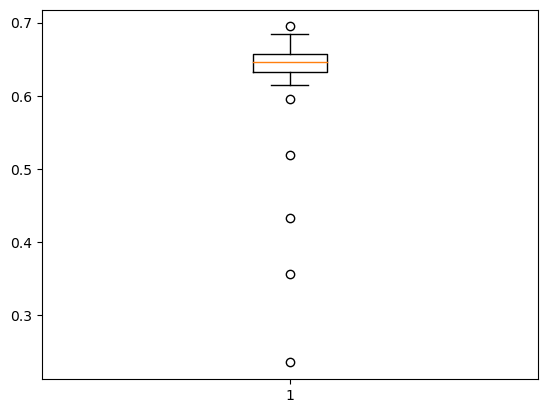

In [17]:
plt.boxplot(R_2ar)

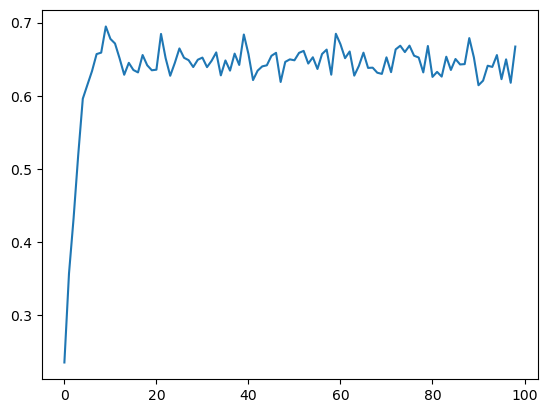

In [18]:
plt.plot(range(len(R_2ar)),R_2ar)

{'whiskers': [<matplotlib.lines.Line2D at 0x2545e9d4b10>,
 'caps': [<matplotlib.lines.Line2D at 0x2545e9d6310>,
 'boxes': [<matplotlib.lines.Line2D at 0x2545e9bf6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2545e9d7a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2545e9cb5d0>],
 'means': []}

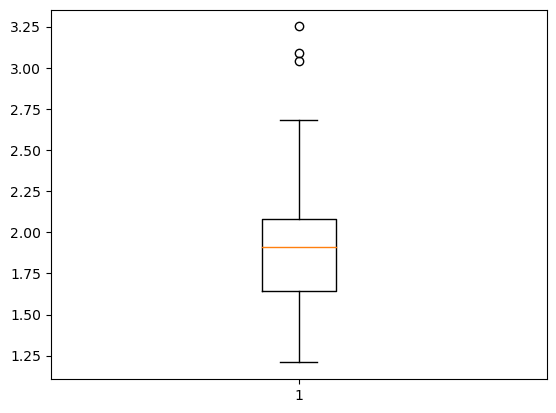

In [19]:
plt.boxplot(MAPEar)

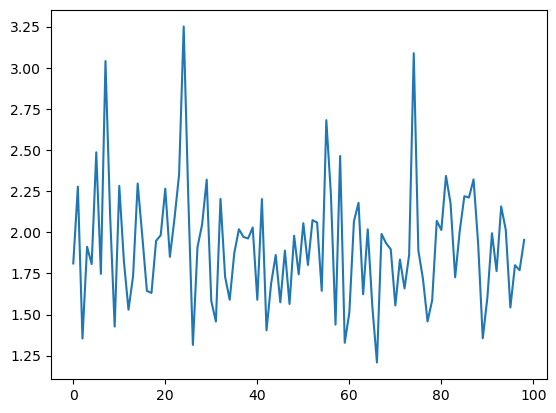

In [20]:
plt.plot(range(len(MAPEar)),MAPEar)

In [21]:
#влияние размера выборки

MSEar=[]
R_2ar=[]
MAPEar=[]

for i in range (1,100):
    X_train, X_test, y_train, y_test = train_test_split(df_std[spisok[:-1]], data['target'], test_size=0.01*i)

    reg3 = tree.DecisionTreeRegressor()
    reg3 = reg3.fit(X_train, y_train)
    y_pred = reg3.predict(X_test)
    MSEar.append(mean_squared_error(y_test, y_pred))
    R_2ar.append(r2_score(y_test, y_pred))
    MAPEar.append(mean_absolute_percentage_error(y_test, y_pred))
    
print(statistics.mean(MSEar))
print(statistics.mean(R_2ar))
print(statistics.mean(MAPEar))


11646.183488096087
0.5842128382101758
2.0187926891375176


{'whiskers': [<matplotlib.lines.Line2D at 0x2545c948250>,
 'caps': [<matplotlib.lines.Line2D at 0x2545c94aed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2545c949dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2545ca118d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2545c948750>],
 'means': []}

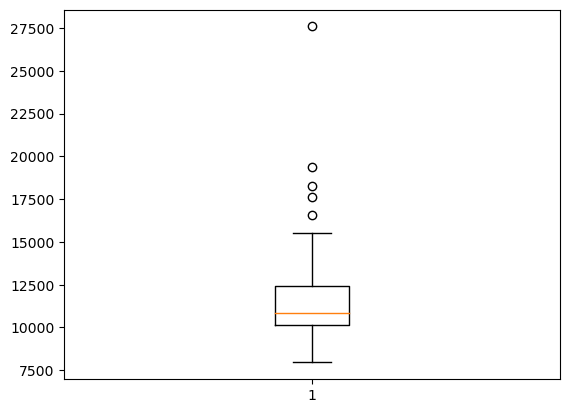

In [22]:
plt.boxplot(MSEar)

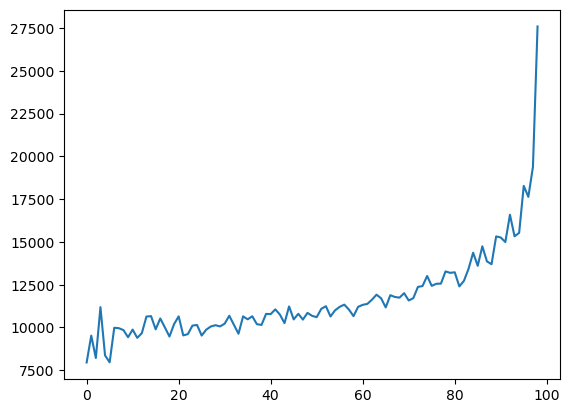

In [23]:
plt.plot(range(len(MSEar)),MSEar)

{'whiskers': [<matplotlib.lines.Line2D at 0x2545e86dd90>,
 'caps': [<matplotlib.lines.Line2D at 0x2545e86f150>,
 'boxes': [<matplotlib.lines.Line2D at 0x2545e86d490>],
 'medians': [<matplotlib.lines.Line2D at 0x2545e87c050>],
 'fliers': [<matplotlib.lines.Line2D at 0x2545ea67310>],
 'means': []}

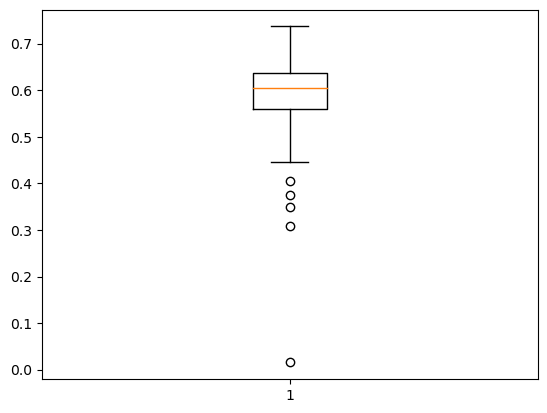

In [24]:
plt.boxplot(R_2ar)

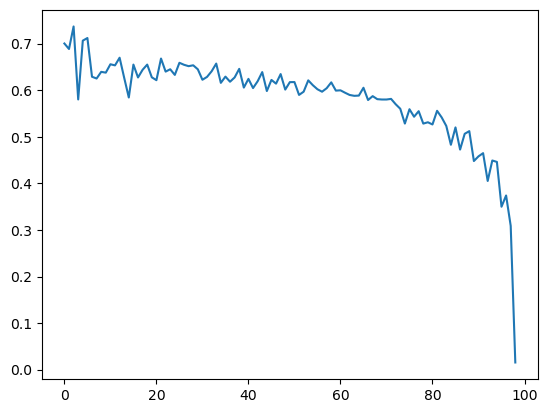

In [25]:
plt.plot(range(len(R_2ar)),R_2ar)

{'whiskers': [<matplotlib.lines.Line2D at 0x2545c9c5fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2545d3a7710>,
 'boxes': [<matplotlib.lines.Line2D at 0x2545d3a5350>],
 'medians': [<matplotlib.lines.Line2D at 0x2545d3b0cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2545e8a3190>],
 'means': []}

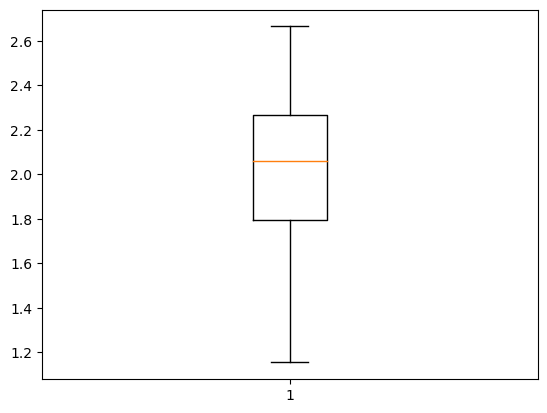

In [26]:
plt.boxplot(MAPEar)

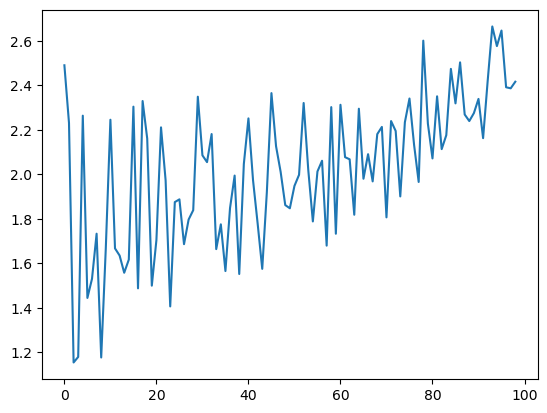

In [27]:
plt.plot(range(len(MAPEar)),MAPEar)

In [30]:
#сравним с линейной регрессией для выборки размером 100
print(df_norm.head())
print(data.head())

X_train, X_test, y_train, y_test = train_test_split(df_std[spisok[:-1]], data['target'], train_size=0.0125)
#X_test_100 = X_test.sample(n=100)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred_l = regr.predict(X_test)

MSEl = mean_squared_error(y_test, y_pred_l)
r2l = r2_score(y_test, y_pred_l)
MAPEl = mean_absolute_percentage_error(y_test, y_pred_l)

print('MSE l = ',MSEl)
print('R_2 l = ',r2l)
print('MAPE l = ',MAPEl)


reg4 = tree.DecisionTreeRegressor(max_depth=20,min_samples_leaf=15)
reg4 = reg4.fit(X_train, y_train)
y_pred_t = reg4.predict(X_test)

MSEt = mean_squared_error(y_test, y_pred_t)
r2t = r2_score(y_test, y_pred_t)
MAPEt = mean_absolute_percentage_error(y_test, y_pred_t)

print('MSE t = ',MSEt)
print('R_2 t = ',r2t)
print('MAPE t = ',MAPEt)


#линейная регрессия victory

         0         1         2         3         4         5         6   \
0  0.494979  0.521406  0.396122  0.454067  0.266771  0.560457  0.262068   
1  0.615328  0.446782  0.457158  0.251977  0.392646  0.546343  0.457070   
2  0.431347  0.499724  0.502212  0.606295  0.250161  0.527569  0.639245   
3  0.450929  0.547398  0.801788  0.557356  0.703652  0.550012  0.487607   
4  0.375010  0.553370  0.219343  0.632120  0.763628  0.562376  0.268443   

         7         8         9         10        11        12        13  \
0  0.641001  0.455413  0.400554  0.556983  0.757800  0.495932  0.709985   
1  0.398883  0.370686  0.216098  0.441231  0.608246  0.562347  0.895157   
2  0.398926  0.675110  0.325433  0.443276  0.252878  0.564718  0.699380   
3  0.554551  0.424378  0.400819  0.248269  0.350540  0.334514  0.681008   
4  0.478711  0.455413  0.381472  0.406590  0.621918  0.593753  0.638528   

         14  
0  0.671518  
1  0.459461  
2  0.185203  
3  0.490793  
4  0.592293  
    feature_1 

In [39]:
y_predict = reg.predict(dfP_std)
print(y_predict)

[-297.70066986   50.6697155  -377.36849476 ...   -1.14937049 -132.75089715
 -106.01442602]


In [40]:
# Воспользуйтесь данным кодом для сохранения предсказанных данных. Не удаляйте эту ячейку.

HW_number = 2 # Здесь нужно указать номер домашнего задания 
student_id = 13# Здесь нужно указать student_id
data = y_predict     # Здесь нужно указать предсказанные моделью данные в формате numpy.array

y_pred = pd.DataFrame(data = data, columns = ['target'])
y_pred.to_csv(f'y_pred-HW_{HW_number}-sid_{student_id}.csv')